In [1]:
import os
import sys
sys.path.append( os.path.abspath("../../workspace/python-work/python 3/cs230_deeplearning_implement/ec_code/")  )
from  class1.week3.assignment3.planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
from  class1.week3.assignment3.testCases import * 
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline
#建立一个神经网络，它有一个隐藏层。
#带有一个隐藏层的平面数据分类


np.random.seed(1) # set a seed so that the results are consistent
X,Y=load_planar_dataset()
print(X.shape,Y.shape)
#print(X,Y)


(2, 400) (1, 400)


(1, 400) (400,)


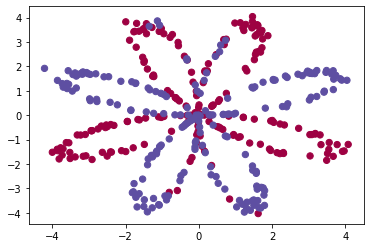

In [2]:
print(Y.shape,np.squeeze(Y).shape)
plt.scatter(X[0,:],X[1,:],c=np.squeeze(Y),s=40,cmap=plt.cm.Spectral)

In [3]:
shape_X=X.shape
shape_Y=Y.shape
m=shape_X[1]
print(shape_X,"\n",shape_Y,"\n",m),

(2, 400) 
 (1, 400) 
 400


(None,)

In [4]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)


C:\software_installed_cs\Anaconda3\envs\tensorflow2\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\software_installed_cs\Anaconda3\envs\tensorflow2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

47.0 %


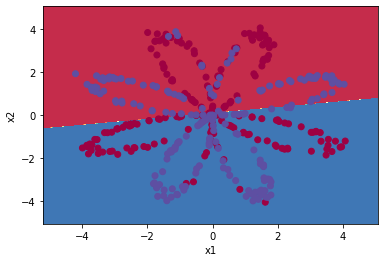

In [5]:
plot_decision_boundary(lambda x:clf.predict(x),X,np.squeeze(Y))

predictions=clf.predict(X.T)
accuracy=np.sum(Y @ predictions +(1-Y) @ (1-predictions))  / X.shape[1]
print(accuracy*100,"%")

In [6]:
#神经网络 input=2  sizeof_hidder_layer=4  output=1   layer=2
def layer_sizer(X,Y):
    n_x=X.shape[0]
    n_h=4  #the size of the hidden layer
    n_y=Y.shape[1]  #输出层
    return (n_x,n_h,n_y)

def initialize_paremeters(n_x,n_h,n_y):
    np.random.seed(2)   #指定一个随机种子，以便你的输出与我们的一样。
    W1=np.random.randn(n_h,n_x)*0.01  # (4,2)
    b1=np.zeros(shape=(n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01  # (1,4)
    b2=np.zeros(shape=(n_y,1))
    
    parameters={"W1":W1,"b1":b1,"W2":W2,"b2":b2 }
    return  parameters

n_x,n_h,n_y=2,4,1
parameters=initialize_paremeters(n_x,n_h,n_y)
print(parameters)

{'W1': array([[-0.00416758, -0.00056267],
       [-0.02136196,  0.01640271],
       [-0.01793436, -0.00841747],
       [ 0.00502881, -0.01245288]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]), 'b2': array([[0.]])}


cost after iteration 0 : 0.693048


cost after iteration 1000 : 0.309802


cost after iteration 2000 : 0.292433


cost after iteration 3000 : 0.283349


cost after iteration 4000 : 0.276781


cost after iteration 5000 : 0.263472


cost after iteration 6000 : 0.242044


cost after iteration 7000 : 0.235525


cost after iteration 8000 : 0.231410


cost after iteration 9000 : 0.228464


Accuracy= 0.905


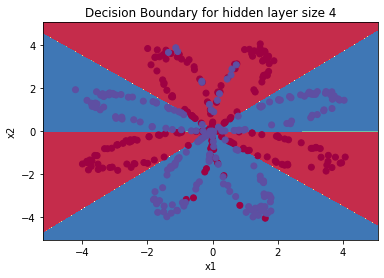

In [7]:
#cost function
# J  = −1m∑i=0m   (  y(i) log(a)+(1−y(i))log(1−a)   )
def compute_cost(A2,Y):
    m=Y.shape[1]
    each_cost_vec=Y*np.log(A2)+(1-Y)*np.log(1-A2)
    cost=-np.sum(each_cost_vec)/m
    # print("cost=",cost,"\n")
    # cost=np.squeeze(cost)
    # print(cost)
    return cost

def forward_propagation(X,parameters):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    Z1=W1 @ X +b1
    A1=np.tanh(Z1)
    Z2=W2 @ A1 +b2
    A2=sigmoid(Z2)
    #使用断言确保我的数据格式是正确的
    assert(A2.shape==(1,X.shape[1]))
    cache={"Z1":Z1,"A1":A1,"Z2":Z2,"A2":A2}
    return A2,cache

def backward_propagation(parameters,cache,X,Y):
    m=X.shape[1]
    W2=parameters["W2"]
    A1=cache["A1"]
    A2=cache["A2"]
    #=============important==============
    #=============important==============
    #=============important==============
    #=============important==============
    dZ2=A2-Y
    dW2=(1/m)*(dZ2 @ A1.T)
    db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dA1=W2.T @ dZ2
    #如g(x)=tanh(x)激活函数   a=tanh(z) 那么a′(z)=1−a**2
    #使用da′(z)= 1 - np.power(A1, 2) 
    dZ1=dA1 * (1- np.power(A1,2))   
    dW1=(1/m)*(dZ1 @ X.T)
    db1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    gradients={"dW1":dW1,"db1":db1,"dW2":dW2,"db2":db2}
    return gradients

def update_parameters(parameters,gradients,learning_rate=1.2):
    W1,W2 = parameters["W1"],parameters["W2"]
    b1,b2 = parameters["b1"],parameters["b2"]
    dW1,dW2 = gradients["dW1"],gradients["dW2"]
    db1,db2 = gradients["db1"],gradients["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    parameters={"W1":W1,"b1":b1,"W2":W2,"b2":b2 }
    return  parameters

def nn_model(X,Y,n_h,n_iterations,print_cost=False):
    np.random.seed(3)  #指定随机种子
    n_x=X.shape[0]
    n_y=Y.shape[0]
    parameters=initialize_paremeters(n_x,n_h,n_y)
    
    for i in range(n_iterations):
        A2,cache=forward_propagation(X,parameters)
        cost=compute_cost(A2,Y)
        gradients=backward_propagation(parameters,cache,X,Y)
        parameters=update_parameters(parameters,gradients,
                                     learning_rate=0.5)
        if print_cost:
            if i%1000==0:
                print("cost after iteration %i : %f"%(i,cost))
    return parameters


def predict(parameters,X):
    A2,cache=forward_propagation(X,parameters)
    predictions=np.round(A2)
    return predictions
    

    

# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, n_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, np.squeeze(Y))
plt.title("Decision Boundary for hidden layer size " + str(4))
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy=',(np.sum  (Y* predictions + (1-Y) *( 1-predictions) ) ) /(Y.size)  )

In [ ]:
#different size of hidden layer
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, n_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, np.squeeze(Y))
    predictions = predict(parameters, X)
    accuracy = (np.sum  (Y* predictions + (1-Y) *( 1-predictions) ) ) /(Y.size)*100
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))






